In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df_variant=pd.read_csv("training_variants.csv")
df_variant.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [34]:
df_train=pd.read_csv('training_text.csv',sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

In [35]:
df=df[df["TEXT"].notnull()]
df.head()

,ID,TEXT,Gene,Variation,Class
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,1
1,1,Abstract Background Non-small cell lung canc...,CBL,W802*,2
2,2,Abstract Background Non-small cell lung canc...,CBL,Q249E,2
3,3,Recent evidence has demonstrated that acquired...,CBL,N454D,3
4,4,Oncogenic mutations in the monomeric Casitas B...,CBL,L399V,4


In [40]:
df= pd.merge(df_train, df_variant, how='left', on='ID')

In [42]:
df=df[df["TEXT"].notnull()]
df.head()

,ID,TEXT,Gene,Variation,Class
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,1
1,1,Abstract Background Non-small cell lung canc...,CBL,W802*,2
2,2,Abstract Background Non-small cell lung canc...,CBL,Q249E,2
3,3,Recent evidence has demonstrated that acquired...,CBL,N454D,3
4,4,Oncogenic mutations in the monomeric Casitas B...,CBL,L399V,4


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 0 to 3320
Data columns (total 5 columns):
ID           3316 non-null int64
TEXT         3316 non-null object
Gene         3316 non-null object
Variation    3316 non-null object
Class        3316 non-null int64
dtypes: int64(2), object(3)
memory usage: 155.4+ KB


In [46]:
df.to_csv(r'C:\Users\pulki\Desktop\pdata.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 5 columns):
ID           3321 non-null int64
TEXT         3316 non-null object
Gene         3321 non-null object
Variation    3321 non-null object
Class        3321 non-null int64
dtypes: int64(2), object(3)
memory usage: 155.7+ KB


In [5]:
df.head()
df.shape

(3321, 5)

In [14]:
df=df[df["TEXT"].notnull()]
df.head()

,ID,TEXT,Gene,Variation,Class
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,1
1,1,Abstract Background Non-small cell lung canc...,CBL,W802*,2
2,2,Abstract Background Non-small cell lung canc...,CBL,Q249E,2
3,3,Recent evidence has demonstrated that acquired...,CBL,N454D,3
4,4,Oncogenic mutations in the monomeric Casitas B...,CBL,L399V,4


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 0 to 3320
Data columns (total 5 columns):
ID           3316 non-null int64
TEXT         3316 non-null object
Gene         3316 non-null object
Variation    3316 non-null object
Class        3316 non-null int64
dtypes: int64(2), object(3)
memory usage: 155.4+ KB


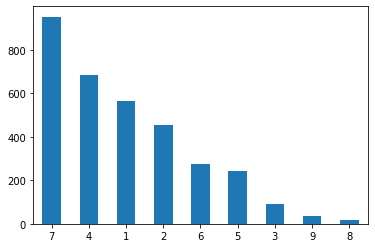

In [16]:
df['Class'].value_counts().plot(kind="bar", rot=0)

In [17]:
df['Class'].value_counts()

7    952
4    686
1    566
2    452
6    273
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [18]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', \
            's', 't'])

In [21]:
from bs4 import BeautifulSoup
import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [47]:
from tqdm import tqdm
updated_text= []

for sentance in (df['TEXT'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    updated_text.append(sentance.strip())
    

In [50]:
Text1

,0
0,cyclin dependent kinases cdks regulate variety...
1,abstract background non small cell lung cancer...
2,abstract background non small cell lung cancer...
3,recent evidence demonstrated acquired uniparen...
4,oncogenic mutations monomeric casitas b lineag...
5,oncogenic mutations monomeric casitas b lineag...
6,oncogenic mutations monomeric casitas b lineag...
7,cbl negative regulator activated receptor tyro...
8,abstract juvenile myelomonocytic leukemia jmml...
9,abstract juvenile myelomonocytic leukemia jmml...


In [61]:
df2= pd.merge(df, Text1, how='left',left_index=True, right_index=True)
df2.head()

,ID,TEXT,Gene,Variation,Class,0
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,Abstract Background Non-small cell lung canc...,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,Abstract Background Non-small cell lung canc...,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,Recent evidence has demonstrated that acquired...,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,Oncogenic mutations in the monomeric Casitas B...,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [62]:
df2.columns

Index(['ID', 'TEXT', 'Gene', 'Variation', 'Class', 0], dtype='object')

In [64]:
df2.columns=['ID', 'TEXT', 'Gene', 'Variation', 'Class', 'Text1']

In [67]:
df2.head()

,ID,Gene,Variation,Class,Text1
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [72]:
df2=df2[df2["Text1"].notnull()]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3311 entries, 0 to 3315
Data columns (total 5 columns):
ID           3311 non-null int64
Gene         3311 non-null object
Variation    3311 non-null object
Class        3311 non-null int64
Text1        3311 non-null object
dtypes: int64(2), object(3)
memory usage: 155.2+ KB


In [49]:
Text1=pd.DataFrame(updated_text)

In [74]:
df.to_csv(r'C:\Users\pulki\Desktop\pkdata.csv')

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(df2["Text1"])
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(df2["Text1"])
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['aa', 'aa aa', 'aa able', 'aa activity', 'aa addition', 'aa adopt', 'aa alone', 'aa amino', 'aa atttatctgctctt', 'aa bottom']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (3311, 302663)
the number of unique words including both unigrams and bigrams  302663


In [76]:
X=final_tf_idf 
y=df2['Class']


In [77]:
df2.shape


(3311, 5)

In [56]:
Text1.shape

(3316, 1)

accuracy= 32.22891566265061


In [103]:
from sklearn.naive_bayes import MultinomialNB
# instantiate learning model alpha = optimal_alpha
nb_optimal1 =  MultinomialNB(alpha = 0.000000001)

# fitting the model
nb_optimal1.fit(X,y)
#knn_optimal.fit(bow_data, y_train)

# predict the response
pred = nb_optimal1.predict(X)


print("Train accuracy", train_acc_bow)

In [104]:
from sklearn.metrics import accuracy_score
acc_bow = accuracy_score(y, pred) * 100
print('accuracy=',acc_bow)

accuracy= 69.73723950468137


In [105]:
import pickle

In [109]:
pickle.dump(nb_optimal1,open("system_naive.pkl","wb"))

In [110]:
my_classifier=pickle.load(open("system_naive.pkl","rb"))

In [111]:
my_classifier

MultinomialNB(alpha=1e-09, class_prior=None, fit_prior=True)